# SHAP Values: Eager Learners II

<hr>

* Support Vector Machine
    * SVC
    * NuSVC
    * LinearSVC

In [1]:
# Import needed libraries and modules
from codecarbon import EmissionsTracker
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import svm
import optuna
from optuna.samplers import GPSampler
from sklearn.pipeline import Pipeline
import shap
import json

# Fetch dataset from UCI Repository
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.original

In [2]:
# ---------------------------------------------------------------------------- #
#                                PRE-PROCESSING                                #
# ---------------------------------------------------------------------------- #

##### SETTINGS #####
PC_Features = True
Random_Seed = 82024
K_Folds = 10
Max_Iterations = 200
####################

# Drop missing values
df = df.dropna()
df = df.reset_index(drop=True)

# Binarize target
df.loc[df['num'] != 0, 'num'] = 1

# Define features and target vectors
X = df.iloc[:,:-1]
y = df['num']

# Separate integer from categorical features
int_features, cat_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],\
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('int', StandardScaler(), int_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

<hr>

## Support Vector Machines:

<hr>

### SVC classification SVM implementation:

In [3]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Load best model parameters
with open('../4-Alternative-Models/params/SVM-SVC-params.json') as f:
    best_parameters = json.load(f)
    
# Create model
model = svm.SVC(**best_parameters)

# Define pipeline depending on whether PCA is requested or not
if PC_Features:
    steps = [
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=12)),
        ('SVM-SVC-classifier', model)
    ]
else:
    steps = [
        ('preprocessor', preprocessor),
        ('SVM-SVC-classifier', model)
    ]
    
pipeline = Pipeline(steps)

# Train model
trained_model = pipeline.fit(X, y)

In [4]:
# ---------------------------------------------------------------------------- #
#                                  SHAP Values                                 #
# ---------------------------------------------------------------------------- #

# Sample
X100 = shap.utils.sample(X, 100)

# Calculate SHAP values
explainer = shap.Explainer(trained_model.predict, X100)
shap_values = explainer(X)

PermutationExplainer explainer: 298it [01:16,  3.50it/s]                         


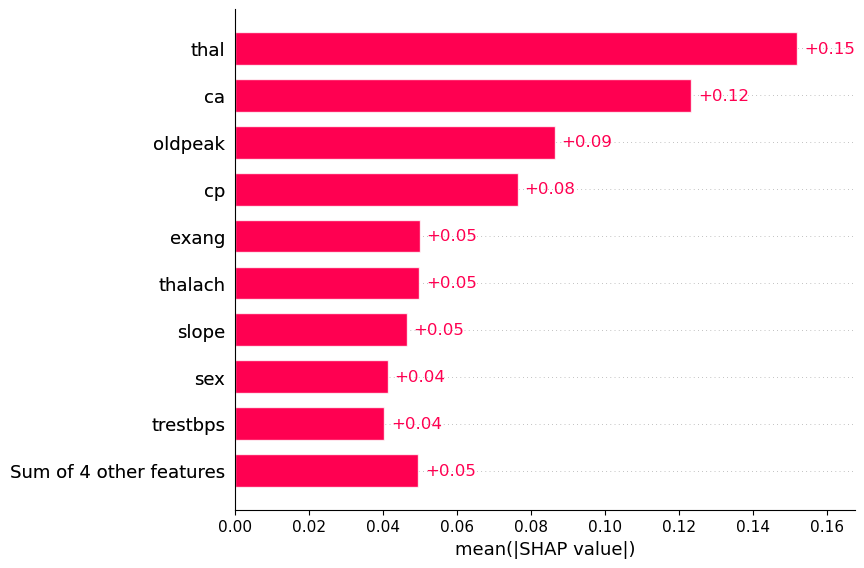

In [5]:
# Vizualize
shap.plots.bar(shap_values)

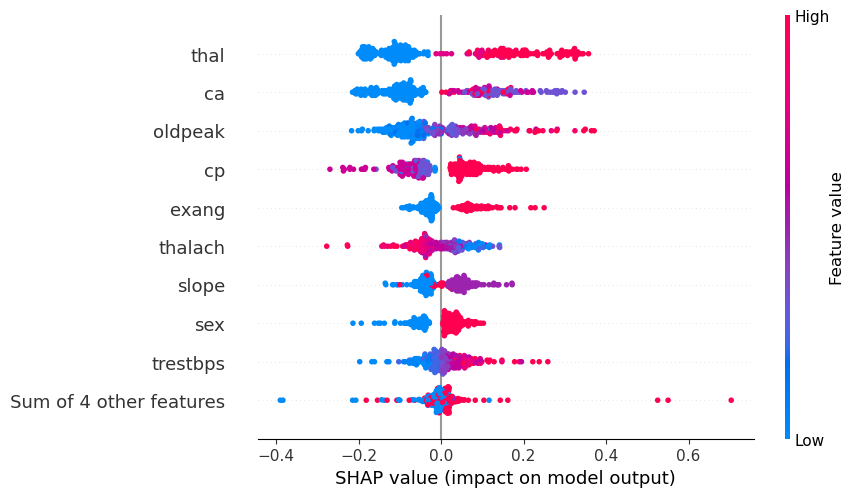

In [6]:
shap.plots.beeswarm(shap_values)

<hr>

### NuSVC classification SVM implementation:

In [7]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Load best model parameters
with open('../4-Alternative-Models/params/SVM-NuSVC-params.json') as f:
    best_parameters = json.load(f)

# Create model
model = svm.NuSVC(**best_parameters)

# Define pipeline depending on whether PCA is requested or not
if PC_Features:
    steps = [
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=12)),
        ('SVM-NuSVC-classifier', model)
    ]
else:
    steps = [
        ('preprocessor', preprocessor),
        ('SVM-NuSVC-classifier', model)
    ]
    
pipeline = Pipeline(steps)

# Train model
trained_model = pipeline.fit(X, y)

In [8]:
# ---------------------------------------------------------------------------- #
#                                  SHAP Values                                 #
# ---------------------------------------------------------------------------- #

# Sample
X100 = shap.utils.sample(X, 100)

# Calculate SHAP values
explainer = shap.Explainer(trained_model.predict, X100)
shap_values = explainer(X)

PermutationExplainer explainer: 298it [00:33,  6.05it/s]                         


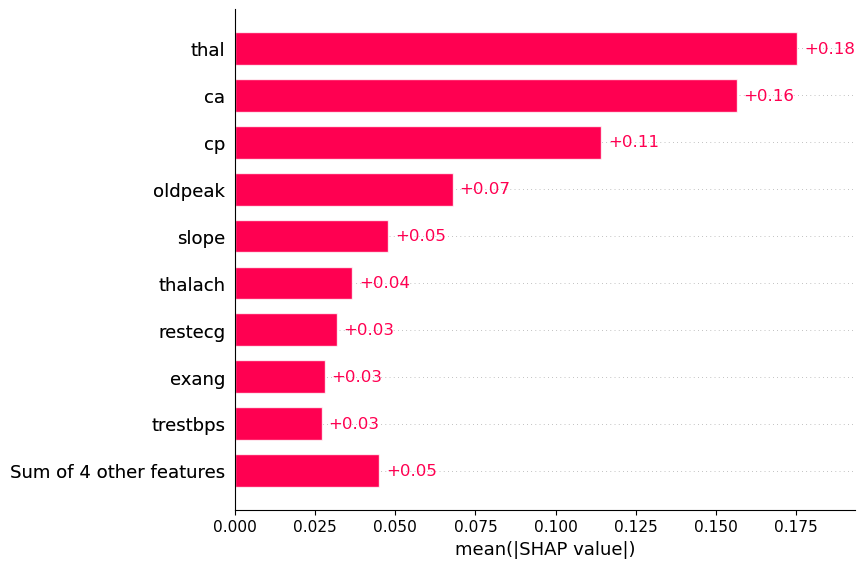

In [9]:
# Vizualize
shap.plots.bar(shap_values)

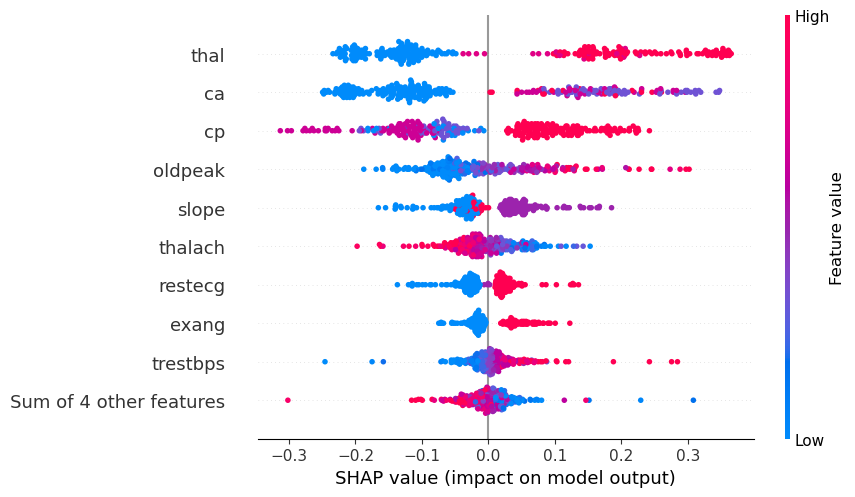

In [10]:
shap.plots.beeswarm(shap_values)

<hr>

### LinearSVC classification SVM implementation:

In [11]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Load best model parameters
with open('../4-Alternative-Models/params/SVM-LinearSVC-params.json') as f:
    best_parameters = json.load(f)

# Create model
model = svm.LinearSVC(**best_parameters)

# Define pipeline depending on whether PCA is requested or not
if PC_Features:
    steps = [
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=12)),
        ('SVM-LinearSVC-classifier', model)
    ]
else:
    steps = [
        ('preprocessor', preprocessor),
        ('SVM-LinearSVC-classifier', model)
    ]
    
pipeline = Pipeline(steps)

# Train model
trained_model = pipeline.fit(X, y)

/home/ABTLUS/alice220049/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [12]:
# ---------------------------------------------------------------------------- #
#                                  SHAP Values                                 #
# ---------------------------------------------------------------------------- #

# Sample
X100 = shap.utils.sample(X, 100)

# Calculate SHAP values
explainer = shap.Explainer(trained_model.predict, X100)
shap_values = explainer(X)

PermutationExplainer explainer: 298it [00:38,  5.58it/s]                         


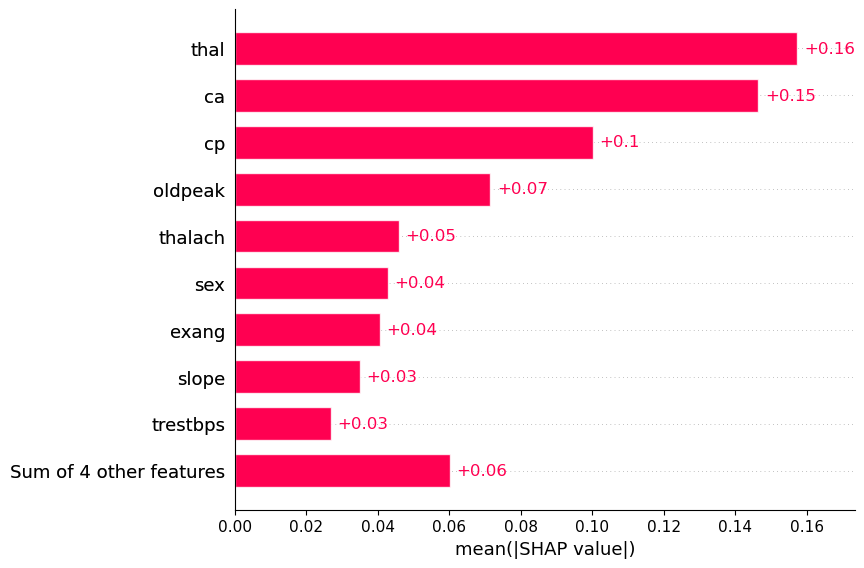

In [13]:
# Vizualize
shap.plots.bar(shap_values)

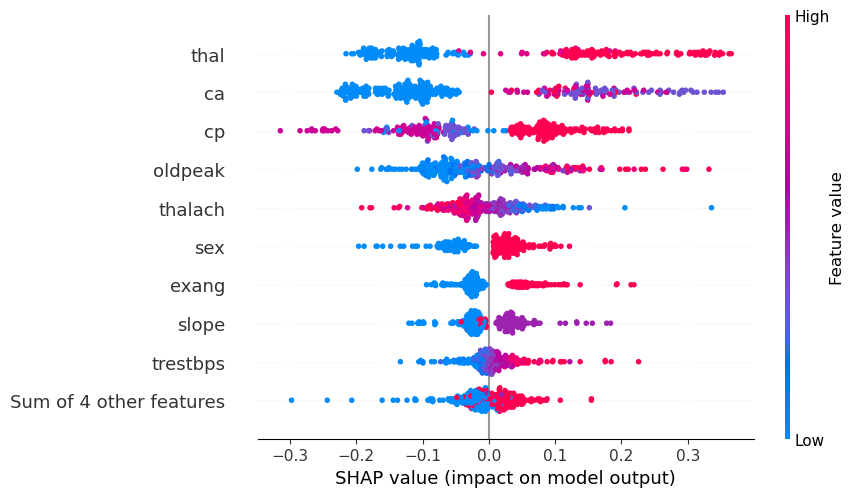

In [14]:
shap.plots.beeswarm(shap_values)